In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from subprocess import PIPE, Popen

In [2]:
def PlotData(EFS_OutputFile, Title, Scale=True):
    """
    PlotData(filename, Title, Scale=True):
    """
    with open(EFS_OutputFile) as read:
        read.readline()
        a = read.readline()
        a = a.split()
        lenght_x = float(a[2])
        a = read.readline()
        a = a.split()
        lenght_y = float(a[2])
        a = read.readline()
        a = a.split()
        dimensional = int(a[2])
        read.readline()
        a = read.readline()
        a = a.split()
        position_x = float(a[2])
        a = read.readline()
        a = a.split()
        position_y = float(a[2])
        a = read.readline()
        a = a.split()
        charge_value = float(a[2])

        for line in read:
            if line == "Data:\n":
                a = read.readline()

    a = a.split()

    data = np.zeros((dimensional, dimensional), float)

    for i, value in enumerate(a):
        a[i] = float(value)

    i = 0
    j = 0
    for k, value in enumerate(a):
        i = int(k%dimensional)
        j = int(k/dimensional)
        data[i][j] = float(value)


    X = np.linspace(0, lenght_x, dimensional)
    Y = np.linspace(0, lenght_y, dimensional)


    fig, ax = plt.subplots(constrained_layout = True)
    ax.set_title(Title)
    if Scale:
        CS = ax.contourf(X, Y, np.log(data), 100, origin = 'lower')
    else:
        CS = ax.contourf(X, Y, (data), 100, origin = 'lower')
        
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel('Value of ln(E)')
    
    


In [81]:
Lenght_x         = 0.01 #cetnimeters
Lenght_y         = 0.01 #cetnimeters
Dimension        = 500
Itteration       = 50000
ParticlesNumbers = 3
EFS_OutputFile   = "outputfile1.txt"
EFP_OutputFile   = "outputfile2.txt"
with open('InputFile.txt', 'w+') as write:
    s = "Substrate:\n\tLenght_x = "+ str(Lenght_x)+"\n\tLenght_y = " + str(Lenght_y)
    write.write(s)
    s = "\nParameters of calculation:\n\tDimenstion = " + str(Dimension)
    write.write(s)
    s = "\n\tItteration = " + str(Itteration)
    write.write(s)
    s = "\nOther parameters:\n\tNumber of electrons = " + str(ParticlesNumbers)
    write.write(s)
    s = "\nName of output files:\n\tOutput EFS-files: " + EFS_OutputFile
    write.write(s)
    s = "\n\tOutput EFP-files: " + EFP_OutputFile
    write.write(s)

In [82]:
!cat InputFile.txt

Substrate:
	Lenght_x = 0.01
	Lenght_y = 0.01
Parameters of calculation:
	Dimenstion = 500
	Itteration = 50000
Other parameters:
	Number of electrons = 3
Name of output files:
	Output EFS-files: outputfile1.txt
	Output EFP-files: outputfile2.txt

In [244]:
cmd = 'g++ main.cpp CHR_PRP.cpp SUB_PRP.cpp FUNC.cpp -c -std=c++14'
subprocess.Popen(cmd, shell=True)

In [245]:
cmd = 'g++ main.o CHR_PRP.o SUB_PRP.o FUNC.o -o DoIt'
subprocess.Popen(cmd, shell=True)

In [10]:
cmd = './DoIt'
subprocess.Popen(cmd, shell=True)

NameError: name 'subprocess' is not defined

<IPython.core.display.Javascript object>


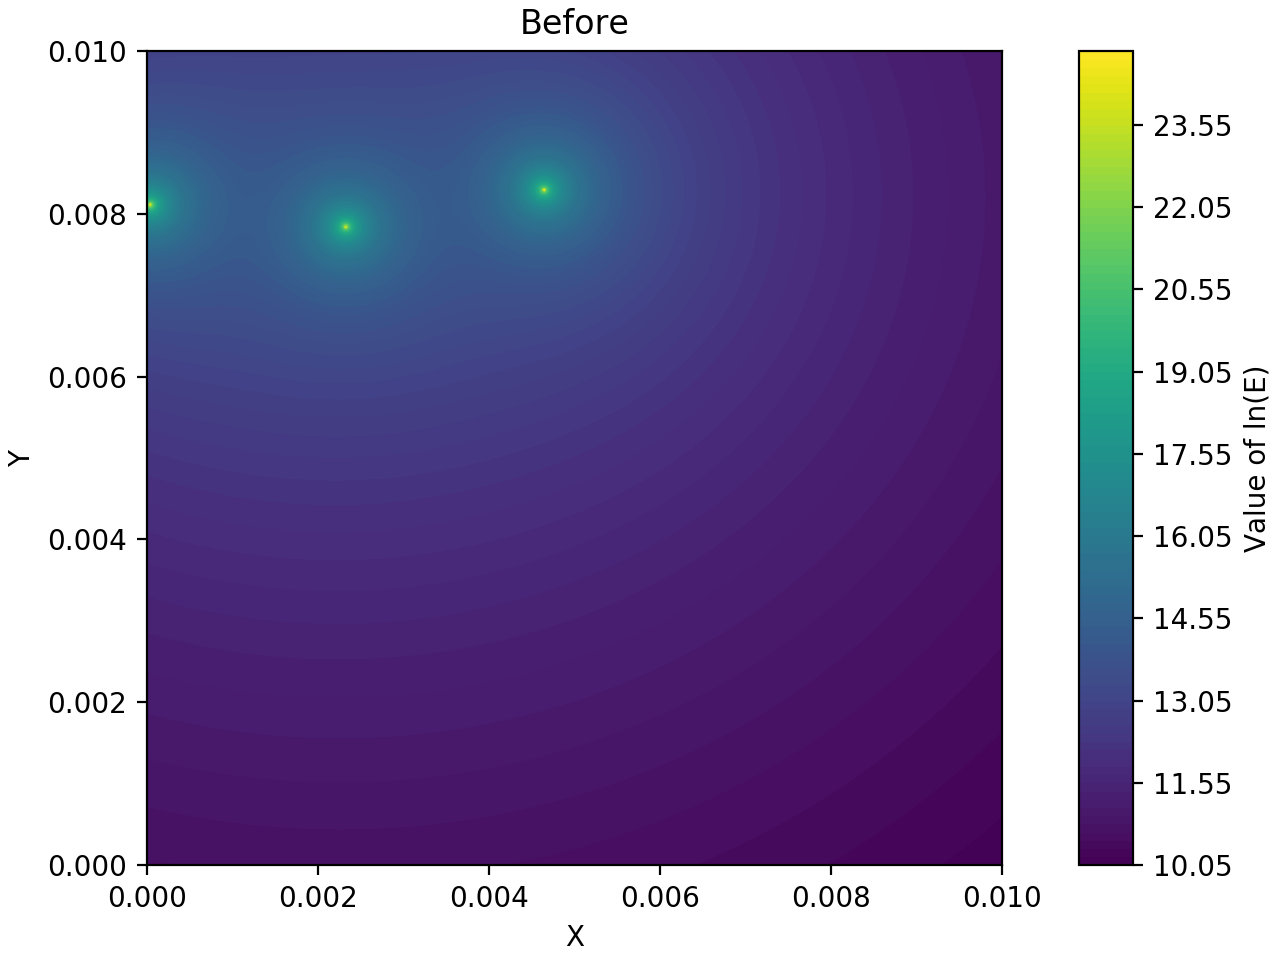

<IPython.core.display.Javascript object>


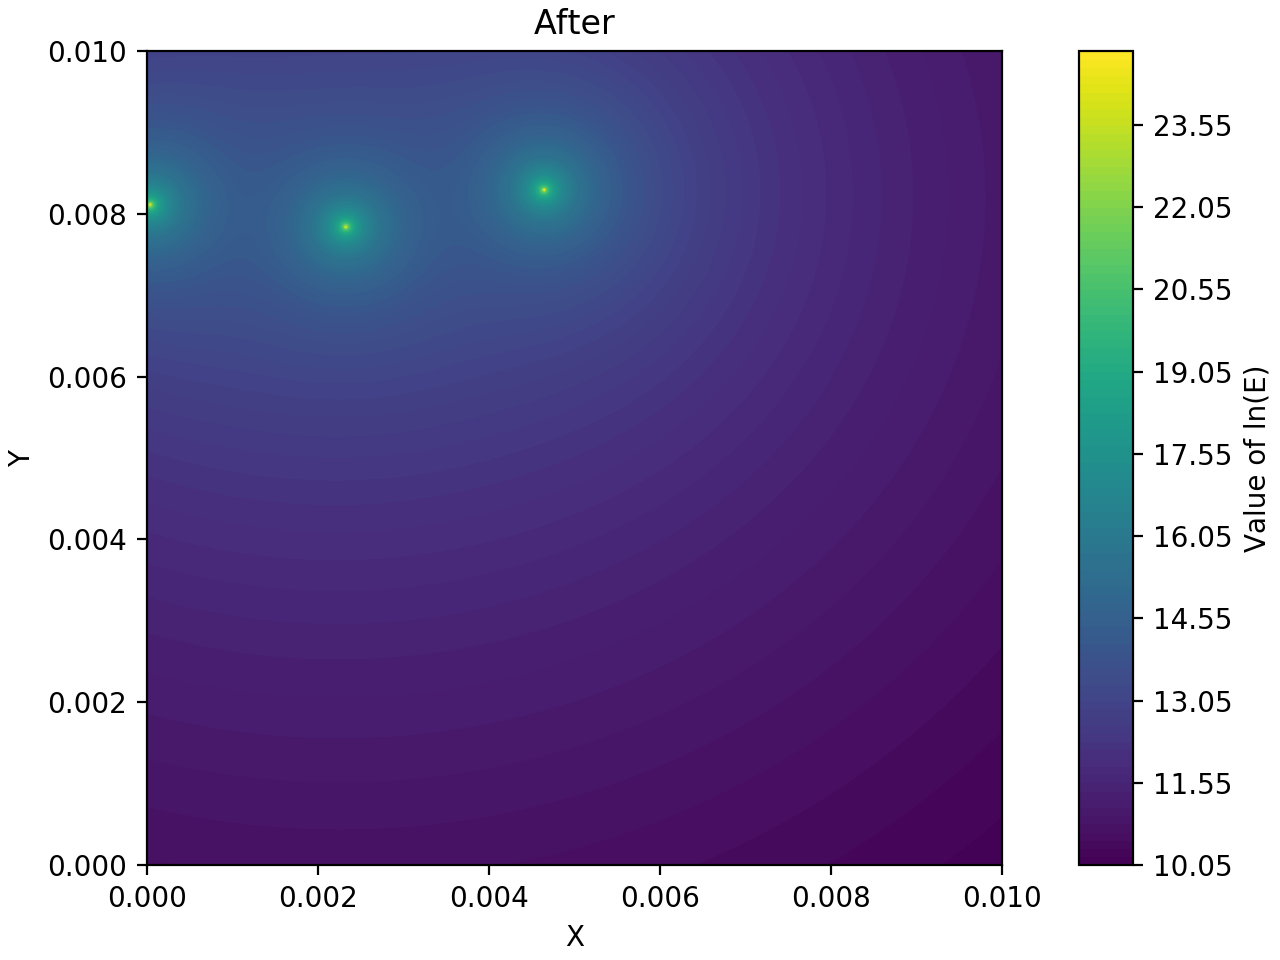

In [84]:
PlotData(EFS_OutputFile, "Before")
PlotData("EFS_af.txt", "After")

<IPython.core.display.Javascript object>


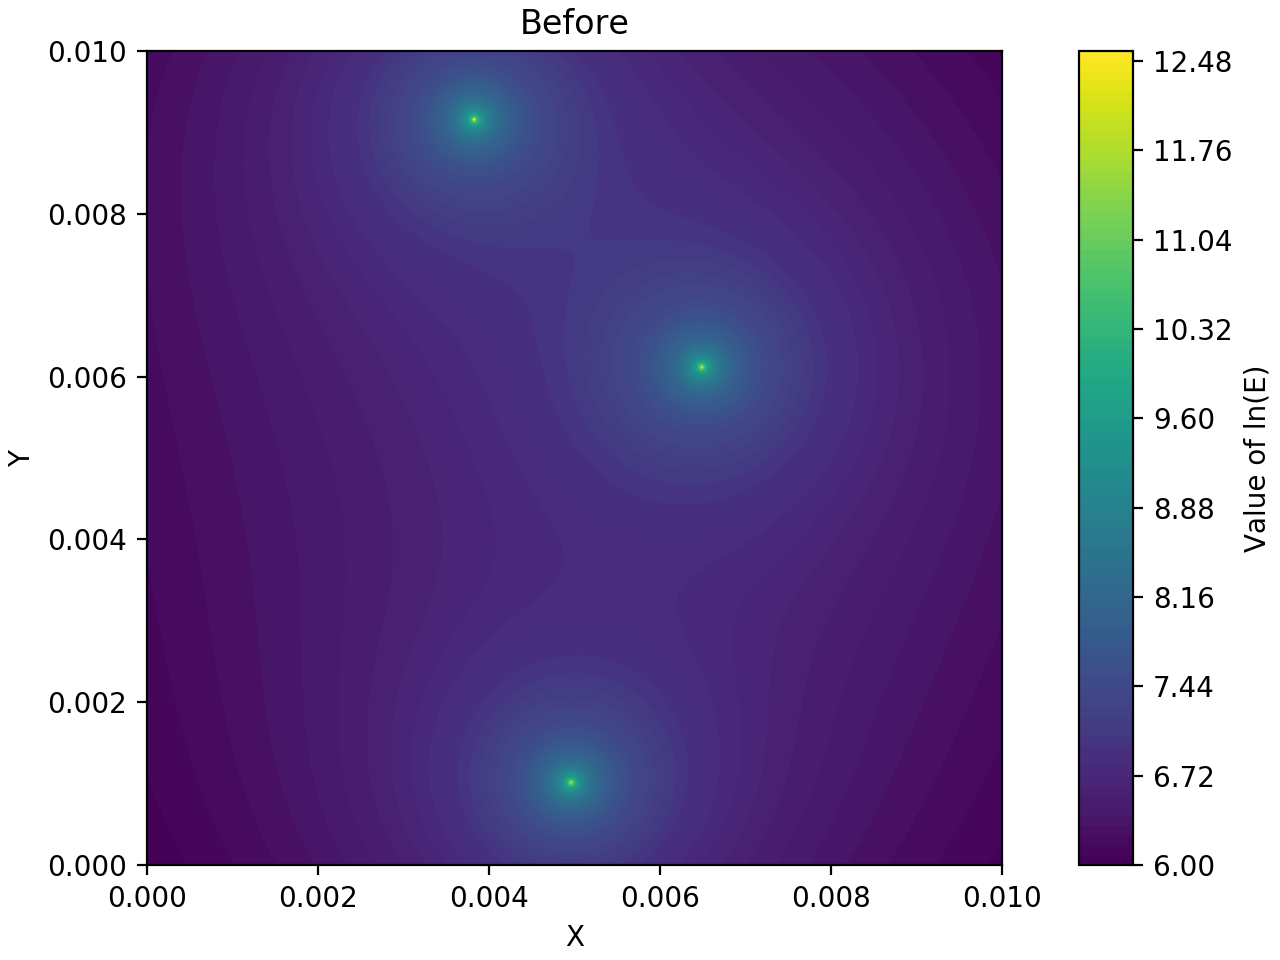

In [10]:
PlotData(EFP_OutputFile, "Before")

<IPython.core.display.Javascript object>


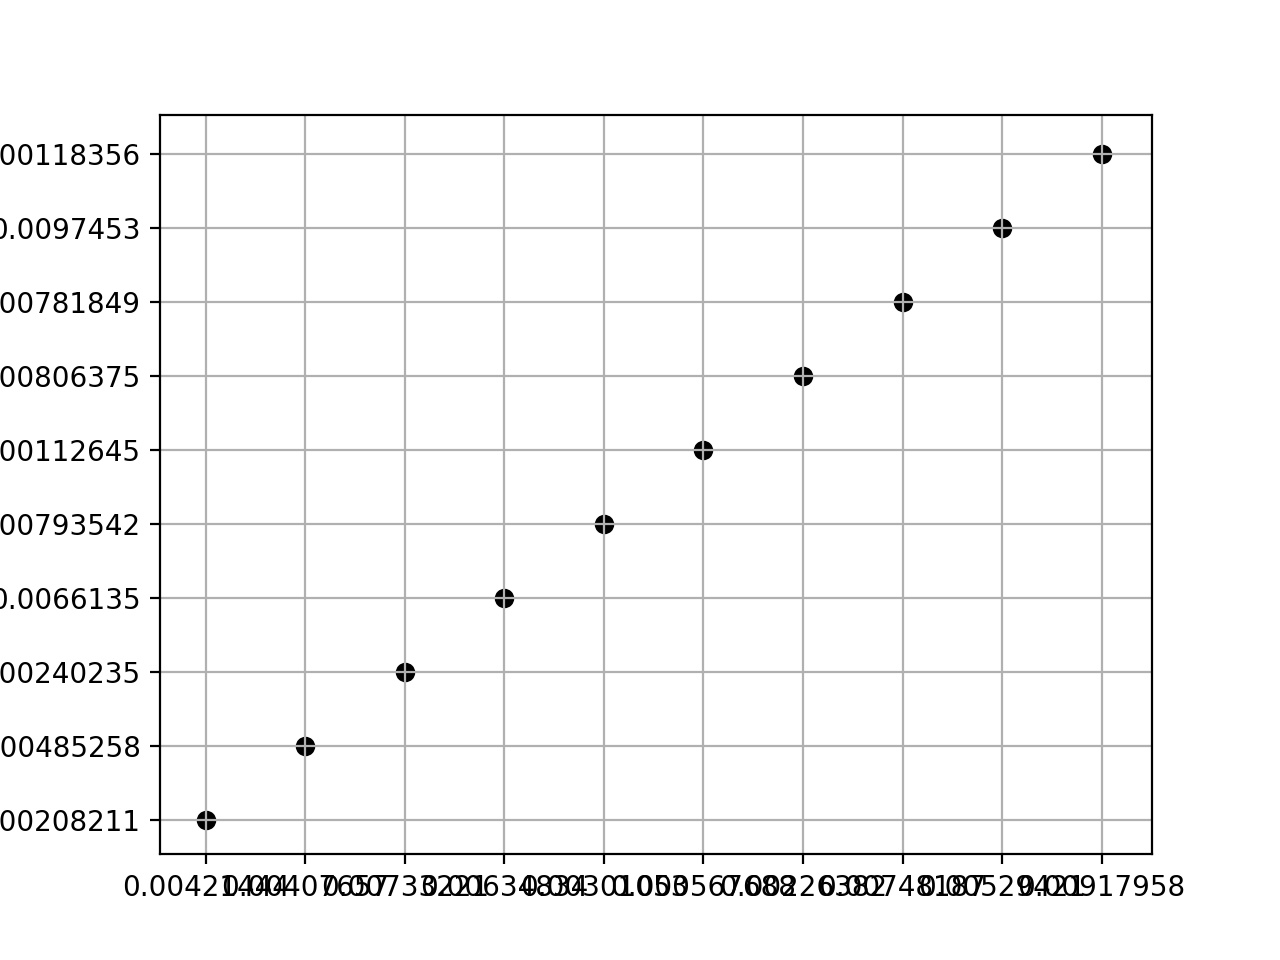

In [85]:
with open("ChargePosition.txt") as read:
    read.readline()
    read.readline()
    read.readline()
    
    s = read.readline()
    s = s.split()
    len_x = float(s[2])
    
    s = read.readline()
    s = s.split(' ')
    len_y = float(s[2]) 
    
    s = read.readline()
    s = s.split()
    dim = int(s[2]) 
    
    read.readline()
    s = read.readline()
    s = s.split()
    read.readline()
    plt.figure()
    plt.grid()
    for i in range(int(s[1])):
        a = read.readline()
        a = a.split()
        plt.scatter(a[0], a[1], color = 'black')


In [44]:
len_x, len_y

(0.01, 0.01)

In [54]:
!cat "ChargePosition.txt"

File with coordinates of charge particales

Substrate parameters:
	Lenght_X = 0.01
	Lenght_Y = 0.01
	Dimension = 500

NumberOfParticle: 3
	x	y
	0.00409939	0.00847663
	0.00667833	0.00269564
	0.00565382	0.00370231


In [86]:
!cat EFP_af.txt

Substrate parameters:
	Lenght_X = 0.01
	Lenght_Y = 0.01
	Dimension = 500
Particle parameters:
	Position_X = 0.00463785
	Position_Y = 0.00827645
	Charge_value = 1
Particle parameters:
	Position_X = 0.0023245
	Position_Y = 0.00782472
	Charge_value = 1
Particle parameters:
	Position_X = 3.9751e-05
	Position_Y = 0.00809433
	Charge_value = 1
Data:


351.454 352.243 353.035 353.83 354.629 355.431 356.237 357.047 357.86 358.676 359.496 360.32 361.147 361.978 362.813 363.652 364.494 365.34 366.19 367.043 367.901 368.762 369.628 370.497 371.37 372.247 373.128 374.013 374.902 375.796 376.693 377.594 378.5 379.41 380.324 381.242 382.165 383.092 384.023 384.959 385.899 386.843 387.792 388.746 389.704 390.666 391.633 392.605 393.581 394.562 395.548 396.538 397.534 398.534 399.539 400.548 401.563 402.583 403.607 404.637 405.672 406.712 407.757 408.807 409.862 410.923 411.989 413.06 414.137 415.219 416.306 417.399 418.497 419.601 420.711 421.826 422.947 424.074 425.206 426.345 427.489 428.639 429.795 430.957 432.125 433.299 434.479 435.666 436.859 438.058 439.263 440.475 441.693 442.917 444.149 445.386 446.631 447.882 449.139 450.404 451.675 452.954 454.239 455.531 456.831 458.137 459.451 460.772 462.1 463.435 464.778 466.129 467.487 468.852 470.226 471.607 472.995 474.392 475.797 477.209 478.63 480.059 481.496 482.941 484.394 485.856 487.3

3.04 2067.47 2024.4 1983.6 1944.91 1908.14 1873.16 1839.83 1808.03 1777.66 1748.6 1720.78 1694.11 1668.51 1643.92 1620.28 1597.52 1575.59 1554.46 1534.06 1514.36 1495.32 1476.9 1459.08 1441.82 1425.08 1408.86 1393.11 1377.82 1362.96 1348.52 1334.47 1320.8 1307.49 1294.52 1281.89 1269.57 1257.55 1245.82 1234.37 1223.18 1212.26 1201.57 1191.13 1180.91 1170.92 1161.13 1151.55 1142.16 1132.97 1123.95 1115.12 1106.45 350.78 351.563 352.348 353.137 353.93 354.725 355.525 356.327 357.134 357.943 358.756 359.573 360.394 361.217 362.045 362.876 363.711 364.55 365.392 366.238 367.088 367.941 368.798 369.66 370.525 371.393 372.266 373.143 374.024 374.908 375.797 376.69 377.587 378.488 379.393 380.302 381.215 382.133 383.054 383.98 384.911 385.845 386.784 387.728 388.675 389.628 390.584 391.545 392.511 393.481 394.456 395.436 396.42 397.408 398.402 399.4 400.403 401.411 402.424 403.441 404.464 405.491 406.523 407.561 408.603 409.651 410.704 411.762 412.825 413.893 414.966 416.045 417.13 418.219 41

2 459.014 460.119 461.229 462.343 463.461 464.584 465.71 466.841 467.977 469.116 470.26 471.409 472.561 473.718 474.88 476.045 477.216 478.39 479.569 480.753 481.941 483.133 484.33 485.532 486.738 487.949 489.164 490.384 491.609 492.838 494.071 495.31 496.553 497.8 499.053 500.31 501.572 502.838 504.11 505.386 506.667 507.952 509.243 510.538 511.838 513.143 514.453 515.767 517.087 518.411 519.74 521.074 522.413 523.757 525.106 526.46 527.819 529.182 530.551 531.925 533.303 534.687 536.075 537.469 538.867 540.271 541.679 543.093 544.512 545.935 547.364 548.797 550.236 551.679 553.128 554.582 556.04 557.504 558.972 560.446 561.924 563.408 564.896 566.39 567.888 569.391 570.9 572.413 573.931 575.453 576.981 578.514 580.051 581.593 583.14 584.692 586.248 587.809 589.375 590.945 592.52 594.1 595.684 597.272 598.865 600.462 602.064 603.67 605.28 606.895 608.513 610.136 611.763 613.394 615.028 616.667 618.309 619.955 621.605 623.258 624.914 626.574 628.238 629.904 631.574 633.246 634.922 636.

62.169 461.845 461.516 461.183 460.845 460.502 460.155 459.804 459.448 459.087 458.722 458.353 457.98 457.602 457.22 456.834 456.444 456.05 455.652 455.25 454.844 454.434 454.02 453.602 453.181 452.755 452.327 451.894 451.458 451.018 450.575 450.128 449.678 282.963 283.384 283.806 284.228 284.652 285.076 285.502 285.928 286.355 286.783 287.212 287.642 288.073 288.505 288.938 289.372 289.806 290.242 290.678 291.116 291.554 291.994 292.434 292.875 293.317 293.76 294.204 294.649 295.095 295.542 295.99 296.439 296.888 297.339 297.791 298.243 298.697 299.151 299.607 300.063 300.52 300.978 301.438 301.898 302.359 302.821 303.284 303.748 304.213 304.679 305.146 305.614 306.082 306.552 307.023 307.494 307.967 308.44 308.915 309.39 309.867 310.344 310.823 311.302 311.782 312.263 312.745 313.228 313.713 314.198 314.683 315.17 315.658 316.147 316.637 317.128 317.619 318.112 318.605 319.1 319.595 320.092 320.589 321.087 321.587 322.087 322.588 323.09 323.593 324.097 324.602 325.108 325.614 326.122